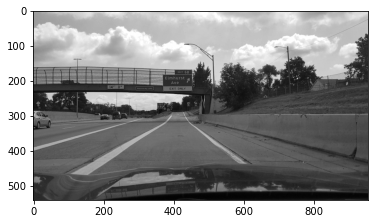

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

image=cv2.imread("new_test_image_3.jpg")

cv2.imshow("Original Image",image)
cv2.waitKey()
cv2.destroyAllWindows()

height,width=image.shape[:2]

image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray,cmap='gray')

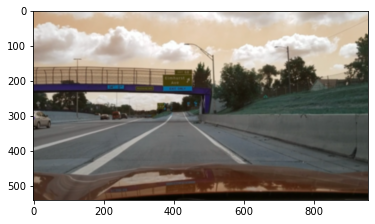

In [5]:
#Gaussian Blurring and Canny
image_blurred=cv2.GaussianBlur(image,(7,7),0)
plt.imshow(image_blurred)

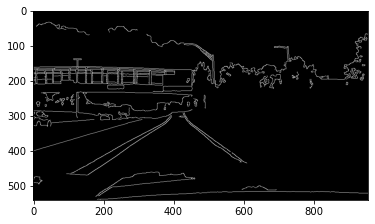

In [6]:
threshold_low=10
threshold_high=200

image_canny=cv2.Canny(image_blurred,threshold_low,threshold_high)
plt.imshow(image_canny,cmap='gray')

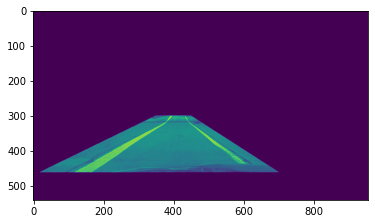

In [10]:
#Define Region of Interest
vertices=np.array([[(20,460),(350,300),(450,300),(700,460)]],dtype=np.int32)
mask=np.zeros_like(image_gray)
cv2.fillPoly(mask,vertices,255)
masked_image=cv2.bitwise_and(image_gray,mask)
plt.figure()
plt.imshow(masked_image)


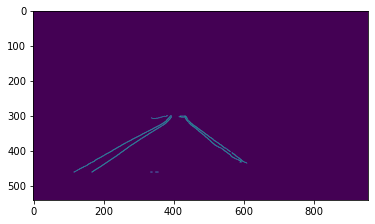

In [12]:
masked_image=cv2.bitwise_and(image_canny,mask)
plt.imshow(masked_image)

In [18]:
#Hough Line Detection
rho=2
theta=np.pi/180
threshold=40
min_line_len=100
max_line_gap=50

lines=cv2.HoughLinesP(masked_image,rho,theta,threshold,np.array([]),minLineLength=min_line_len,maxLineGap=max_line_gap)

line_image=np.zeros((masked_image.shape[0],masked_image.shape[1],3),dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),[255,0,0],20)
        
lines

a=1
b=1
c=1

img_with_lines=cv2.addWeighted(image,a,line_image,b,c)
plt.figure()
cv2.imshow("Lines Detected!",img_with_lines)
cv2.waitKey()
cv2.destroyAllWindows()

<Figure size 432x288 with 0 Axes>